## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

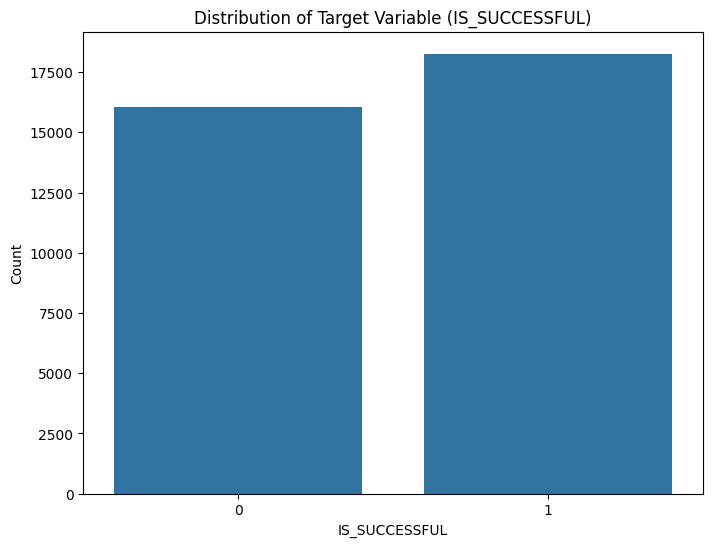

In [2]:
# Visualisation of target variable
target_variable = 'IS_SUCCESSFUL'

# Plot distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=target_variable, data=application_df)
plt.title('Distribution of Target Variable (IS_SUCCESSFUL)')
plt.xlabel(target_variable)
plt.ylabel('Count')

# Save the plot
plt.savefig('target_variable_distribution.png')

# Download the saved plot
from google.colab import files
files.download('target_variable_distribution.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

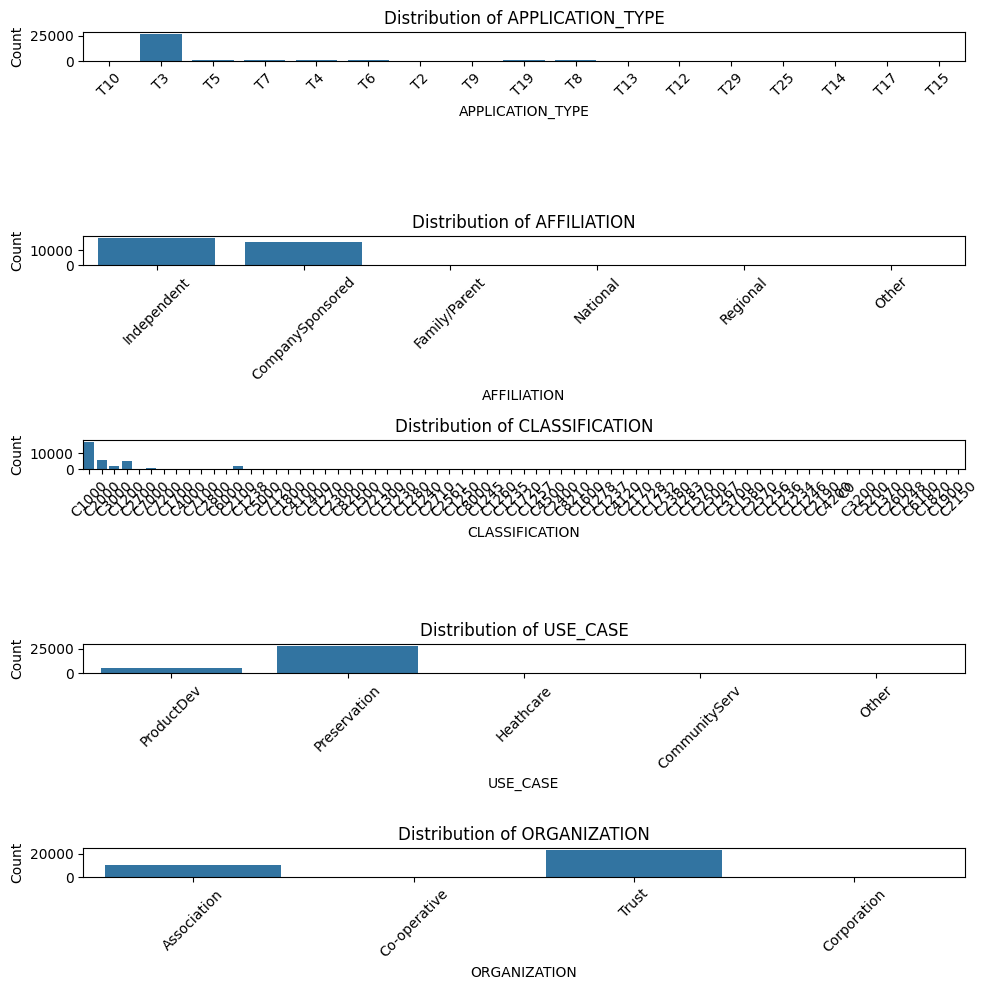

In [3]:
# Visualisation of feature variables

selected_features = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION']

fig, axes = plt.subplots(nrows=len(selected_features), ncols=1, figsize=(10, 10))

for i, feature in enumerate(selected_features):
    sns.countplot(x=feature, data=application_df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

# Save the plot
plt.savefig('feature_variables_distribution_plot.png')

# Download the saved plot
from google.colab import files
files.download('feature_variables_distribution_plot.png')

<ipython-input-4-1e0a1cbf096b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = application_df.corr()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

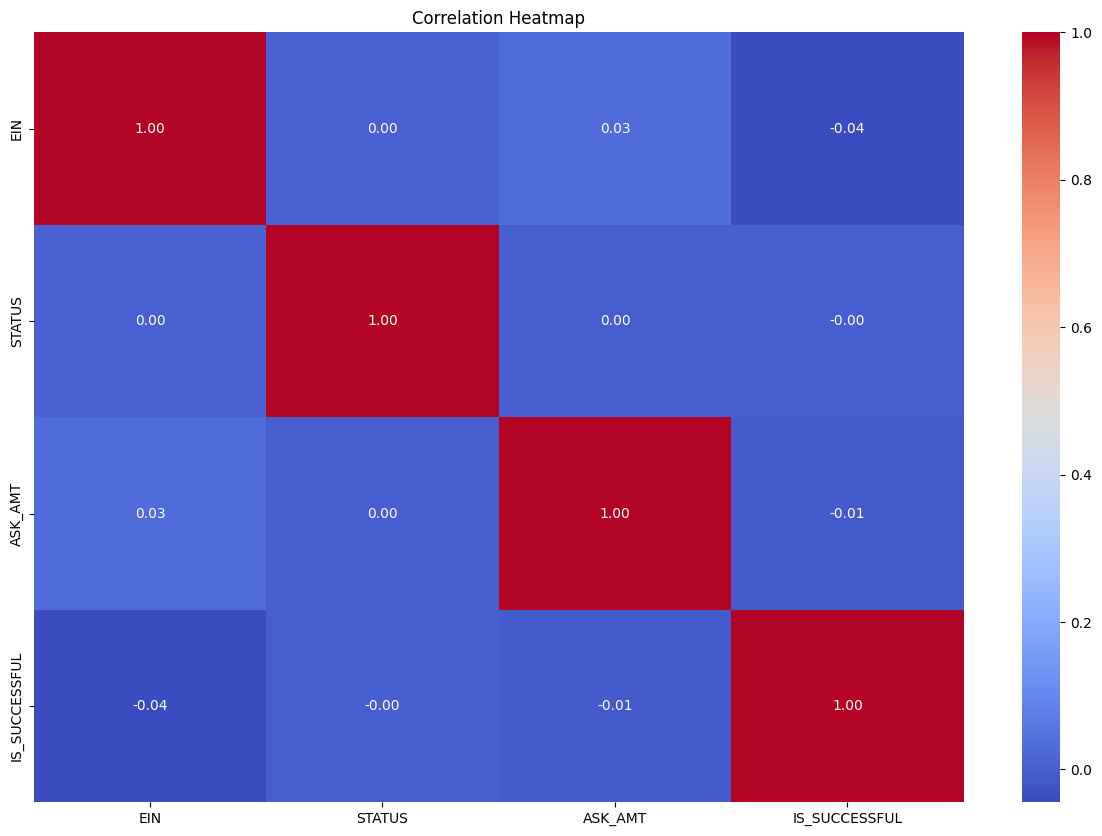

In [4]:
# Visualisation of variables to be removed

# Calculate the correlation matrix
correlation_matrix = application_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')

# Save the plot
plt.savefig('correlation_heatmap_plot.png')

# Download the saved plot
from google.colab import files
files.download('correlation_heatmap_plot.png')



In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

# Display the first few rows of the DataFrame to confirm the changes
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

cutoff_value = 500

# Create a list of application types to be replaced with "Other"
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts()[application_df['APPLICATION_TYPE'].value_counts() < cutoff_value].index.tolist()


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts[classification_counts > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classification_cutoff_value = 1000  # You can adjust this based on the value counts you observed

# Create a list of classifications to be replaced with "Other"
classifications_to_replace = classification_counts[classification_counts < classification_cutoff_value].index.tolist()


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Convert categorical data to numeric with pd.get_dummies
# Identify categorical columns
categorical_columns = ['SPECIAL_CONSIDERATIONS', 'AFFILIATION', 'USE_CASE', 'ORGANIZATION', 'APPLICATION_TYPE', 'CLASSIFICATION', 'INCOME_AMT']
application_df_encoded = pd.get_dummies(application_df, columns=categorical_columns)

# Display the first few rows of the encoded DataFrame
application_df_encoded.head()


,STATUS,ASK_AMT,IS_SUCCESSFUL,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,...,CLASSIFICATION_Other,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,108590,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,5000,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,6692,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,142590,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

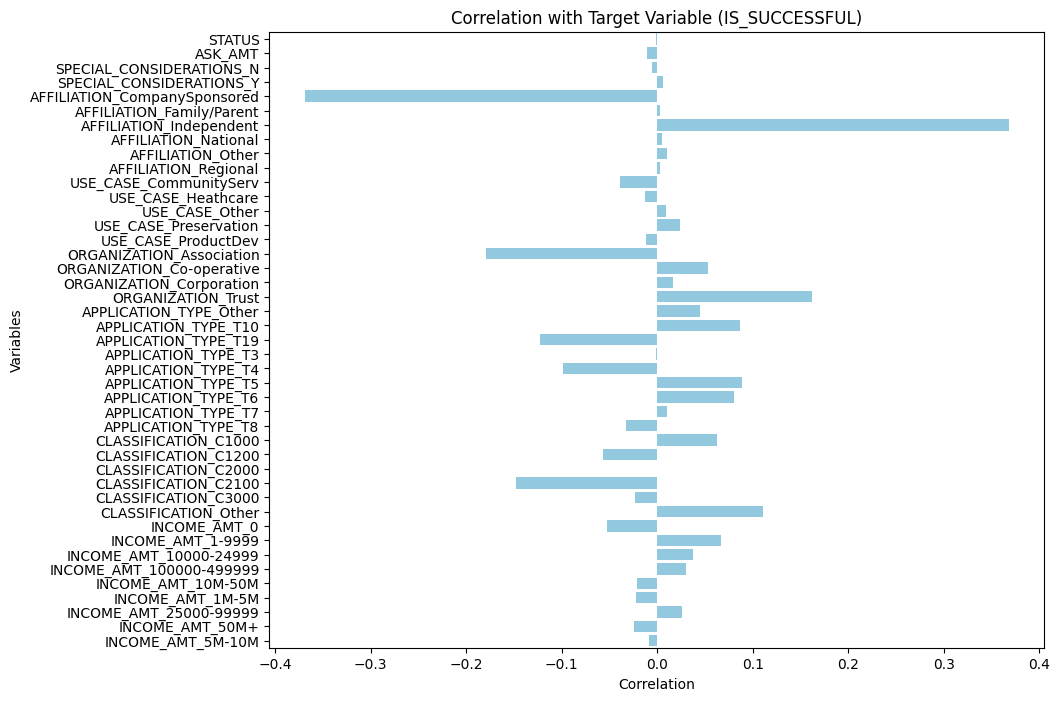

In [13]:
# Correlation of feature variables with target variable

# Calculate the correlation between each variable and the target 'IS_SUCCESSFUL'
correlation_with_target = application_df_encoded.corr()['IS_SUCCESSFUL']

# Select only non-target variables for visualization
non_target_variables = correlation_with_target.index[correlation_with_target.index != 'IS_SUCCESSFUL']

# Plot the correlation values
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_target[non_target_variables], y=non_target_variables, color='skyblue')
plt.title('Correlation with Target Variable (IS_SUCCESSFUL)')
plt.xlabel('Correlation')
plt.ylabel('Variables')

# Save the plot
plt.savefig('correlation_with_target_plot.png')

# Download the saved plot
from google.colab import files
files.download('correlation_with_target_plot.png')

In [14]:
application_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   STATUS                        34299 non-null  int64
 1   ASK_AMT                       34299 non-null  int64
 2   IS_SUCCESSFUL                 34299 non-null  int64
 3   SPECIAL_CONSIDERATIONS_N      34299 non-null  uint8
 4   SPECIAL_CONSIDERATIONS_Y      34299 non-null  uint8
 5   AFFILIATION_CompanySponsored  34299 non-null  uint8
 6   AFFILIATION_Family/Parent     34299 non-null  uint8
 7   AFFILIATION_Independent       34299 non-null  uint8
 8   AFFILIATION_National          34299 non-null  uint8
 9   AFFILIATION_Other             34299 non-null  uint8
 10  AFFILIATION_Regional          34299 non-null  uint8
 11  USE_CASE_CommunityServ        34299 non-null  uint8
 12  USE_CASE_Heathcare            34299 non-null  uint8
 13  USE_CASE_Other                3

In [15]:
# Split our preprocessed data into our features and target arrays
X = application_df_encoded.drop(columns='IS_SUCCESSFUL')
y = application_df_encoded['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Display the shapes of the training and testing datasets
print("\nShapes of the training and testing datasets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)



Shapes of the training and testing datasets:
X_train: (25724, 43)
X_test: (8575, 43)
y_train: (25724,)
y_test: (8575,)


In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential(name='sequential')

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5981 (23.36 KB)
Trainable params: 5981 (23.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Visualize the model architecture
plot_model(nn, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Download the saved plot
from google.colab import files
files.download('model_architecture.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
644/644 [==============================] - 7s 6ms/step - loss: 0.5726 - accuracy: 0.7207 - val_loss: 0.5715 - val_accuracy: 0.7197
Epoch 2/100
644/644 [==============================] - 1s 2ms/step - loss: 0.5540 - accuracy: 0.7312 - val_loss: 0.5631 - val_accuracy: 0.7221
Epoch 3/100
644/644 [==============================] - 1s 2ms/step - loss: 0.5511 - accuracy: 0.7322 - val_loss: 0.5627 - val_accuracy: 0.7219
Epoch 4/100
644/644 [==============================] - 1s 2ms/step - loss: 0.5497 - accuracy: 0.7342 - val_loss: 0.5633 - val_accuracy: 0.7213
Epoch 5/100
644/644 [==============================] - 1s 2ms/step - loss: 0.5476 - accuracy: 0.7327 - val_loss: 0.5599 - val_accuracy: 0.7269
Epoch 6/100
644/644 [==============================] - 1s 2ms/step - loss: 0.5461 - accuracy: 0.7357 - val_loss: 0.5675 - val_accuracy: 0.7203
Epoch 7/100
644/644 [==============================] - 1s 2ms/step - loss: 0.5458 - accuracy: 0.7349 - val_loss: 0.5610 - val_accuracy: 0.7213

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5756 - accuracy: 0.7241 - 304ms/epoch - 1ms/step
Loss: 0.5755515694618225, Accuracy: 0.7240816354751587


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

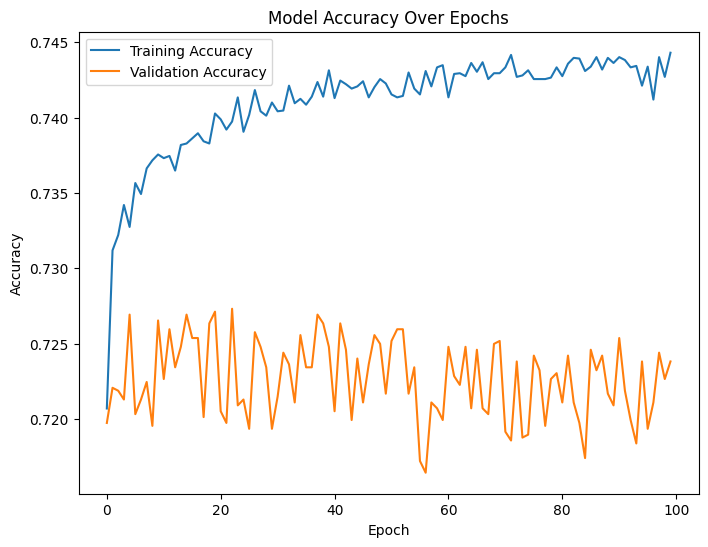

In [22]:
# Visualize training and validation accuracy and save the plot
plt.figure(figsize=(8, 6))
plt.plot(fit_model.history['accuracy'], label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Save the plot
plt.savefig('accuracy_over_epochs_plot.png')

# Download the saved plot
from google.colab import files
files.download('accuracy_over_epochs_plot.png')

In [23]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
